# **Fashion MNIST Image Classification**

In this practical application notebook, we will work with the Fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks (ANNs). This project aims to provide a hands-on experience with image classification tasks, leveraging deep learning techniques.

## **About the dataset**

The dataset, Fashion MNIST, is a collection of 70,000 grayscale images of apparel items, categorized into 10 classes. These classes are numbered from 0 to 9 and have the following meanings:

| Class Number | Class Name     |
|--------------|----------------|
| 0            | T-shirt/top    |
| 1            | Trouser        |
| 2            | Pullover       |
| 3            | Dress          |
| 4            | Coat           |
| 5            | Sandal         |
| 6            | Shirt          |
| 7            | Sneaker        |
| 8            | Bag            |
| 9            | Ankle boot     |

Each image is 28x28 pixels, and the dataset is split into 60,000 training images and 10,000 test images. This dataset serves as a more challenging alternative to the original MNIST dataset, which contains handwritten digits.

## **Objective**

The objective of this project is to build a simple ANN model to classify the images into their respective categories. We will preprocess the data, construct and train the neural network, and evaluate its performance. By the end of this exercise, you will gain a solid understanding of the workflow involved in developing an image classification model.

## **Toolkit**

We will use the TensorFlow implementation of Keras for building and training our model. This project will be executed on **Google Colab**, which provides a convenient and powerful environment for running deep learning experiments.

---

**Author:** Sourena Mohit  
**Source:** This practical project comes from MIT IDSS


## **Importing the necessary libraries**

In [22]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Checking the version of Tensorflow

tf.__version__

'2.18.0'

## **Collecting the Data**

Let's import the data from the tf.keras.datasets module and prepare the train and the test sets.

In [23]:
# Load the data

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

In [26]:
X_train.shape[1] * X_train.shape[2]

784

In [27]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## **Observations**


*   The Fashion MNIST dataset consists of **60,000 images of size 28x28 pixels** in the
training set and **10,000 images** of size 28x28 pixels in the test set. Each image represents an item of clothing from one of 10 classes.
*   Before fitting an ANN model, we need to ***flatten*** these images into a **one-dimensional array**. This transformation is necessary because the input layer of an ANN expects a flat vector rather than a 2D matrix.
*   This suggests that the training set has **10 classes**, where each class denotes a specific type of apparel.
*   By understanding the structure and composition of the dataset, we can better prepare our model for accurate classification.


## **Data Preparation**

To prepare our data for training the ANN model, we need to convert the labels into a categorical format and normalize the pixel values of the images.

First, we convert the labels using `to_categorical`:


In [28]:
y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)

y_test = tf.keras.utils.to_categorical(Y_test, num_classes = 10)

# Let's have a look at the shapes of all the sets

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [29]:
# Let's normalize the dataset. Since there are pixel values ranging from 0-255, we divide by 255 to get the new ranges from 0-1

X_train = X_train/255

X_test = X_test/255

### **Visualization**
- Now, let us visualize the data items.
- We will visualize the first 24 images in the training dataset

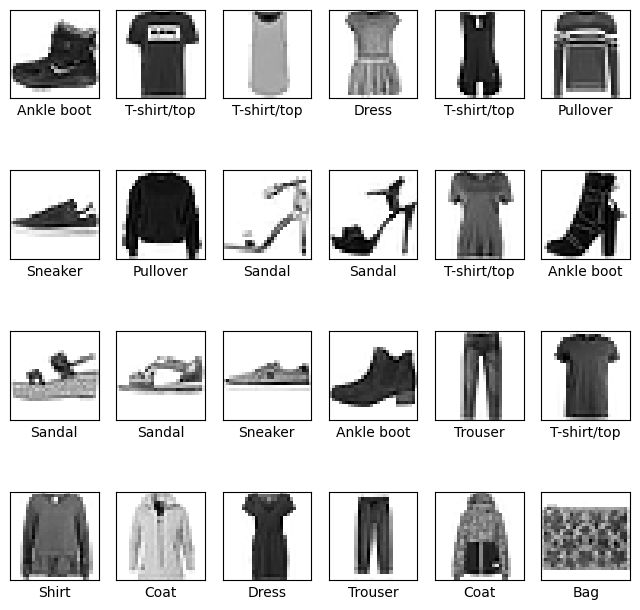

In [30]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (8, 8))

for i in range(24):

    plt.subplot(4, 6, i + 1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(X_train[i], cmap = plt.cm.binary)

    plt.xlabel(class_names_list[Y_train[i]])

plt.show()

## **Model Building**

- We will now start with the model building process.
- We will first create a model with:
 - A layer to flatten the input
 - A hidden layer with 64 nodes (you can play around with this number) and the 'relu' activation
 - Output layer with 10 nodes

- We will use the Adam optimizer, CategoricalCrossentropy as the loss, and accuracy as the metric.

In [31]:
# Initialize a sequential model

model_1 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (28, 28)),

    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [32]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [33]:
# Let us now fit the model

fit_history = model_1.fit(X_train, y_train,validation_split = 0.1, verbose = 1, epochs = 10, batch_size = 64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7392 - loss: 0.7624 - val_accuracy: 0.8405 - val_loss: 0.4395
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8505 - loss: 0.4274 - val_accuracy: 0.8627 - val_loss: 0.3938
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8676 - loss: 0.3754 - val_accuracy: 0.8652 - val_loss: 0.3705
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3525 - val_accuracy: 0.8658 - val_loss: 0.3639
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8848 - loss: 0.3238 - val_accuracy: 0.8713 - val_loss: 0.3696
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8868 - loss: 0.3137 - val_accuracy: 0.8768 - val_loss: 0.3381
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8909 - loss: 0.3008 - val_accuracy: 0.8713 - val_loss: 0.3637
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8901 - loss: 0.2958 - val_accuracy: 0.

**Observations:**
- We can observe that the model's accuracy increases with the increase in the number of epochs.
- For 10 epochs, we are getting an accuracy of about 90% for the training data and about 88% for the validation data.

In [34]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,672 (596.38 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,782 (397.59 KB)

**Observations:**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. When a parameter is learned during training, it is called a trainable parameter, otherwise, it is called a non-trainable parameter.
- The Flatten layer simply flattens each image into a size of 784 (28*28) and there is no learning or training at this layer. Hence, the number of parameters is 0 for the Flatten layer.
- Each image in the form of 784 nodes would be the input for the 'dense' layer. Each node of the previous layer would be connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (784*64)+64 = 50,240.
- Similarly, the last layer - 'dense_1' has (64*10)+10 = 650 parameters.

### **Evaluate the model on the test set**
- Let's predict based on the test data. The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class with the highest predicted probability.
- Let's also create a function to print the classification report and confusion matrix.

In [35]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [36]:
model_1.evaluate(X_test, y_test, verbose = 1)

test_pred = np.argmax(model_1.predict(X_test), axis = -1)

test_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8794 - loss: 0.3405
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([9, 2, 1, ..., 8, 1, 5])

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.79      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.81      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.71      0.61      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



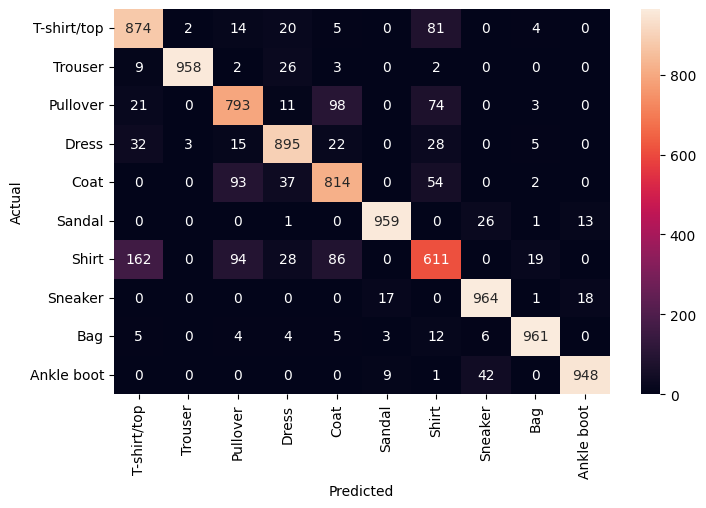

In [37]:
metrics_score(Y_test, test_pred)

**Observations:**
- For each class, a classification report shows the classification metrics - precision, recall, f1-score.
- We can see that class 1 (Trousers), class 7 (Sneaker), class 8 (Bag), class 9 (Ankle boot) have the highest f1-score. Even such a simple model can identify these objects quite appropriately.
- Class 6 (Shirt) has the lowest recall. The model is not able to identify the shirt. The confusion matrix shows that the model has predicted shirts as T-shirts/tops, Pullover, and Coat which is understandable as these items have similar looks.
- Let's try changing the learning rate and train the model for more epochs and see if the model can identify subtle differences in different objects.

### **Further Iterations to model building**
- Let's change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Let's build a bigger network with the new learning rate and epochs.

In [38]:
# Initialize sequential model

model_2 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (28, 28)),

    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
fit_history_2 = model_2.fit(X_train, y_train, epochs = 30, validation_split = 0.1, batch_size = 64, verbose = 2)

Epoch 1/30
844/844 - 4s - 4ms/step - accuracy: 0.8069 - loss: 0.5582 - val_accuracy: 0.8458 - val_loss: 0.4426
Epoch 2/30
844/844 - 2s - 3ms/step - accuracy: 0.8530 - loss: 0.4156 - val_accuracy: 0.8525 - val_loss: 0.4103
Epoch 3/30
844/844 - 4s - 5ms/step - accuracy: 0.8644 - loss: 0.3840 - val_accuracy: 0.8645 - val_loss: 0.3910
Epoch 4/30
844/844 - 4s - 4ms/step - accuracy: 0.8716 - loss: 0.3583 - val_accuracy: 0.8652 - val_loss: 0.3694
Epoch 5/30
844/844 - 3s - 3ms/step - accuracy: 0.8779 - loss: 0.3384 - val_accuracy: 0.8693 - val_loss: 0.3690
Epoch 6/30
844/844 - 6s - 7ms/step - accuracy: 0.8830 - loss: 0.3257 - val_accuracy: 0.8720 - val_loss: 0.3469
Epoch 7/30
844/844 - 4s - 5ms/step - accuracy: 0.8874 - loss: 0.3110 - val_accuracy: 0.8788 - val_loss: 0.3441
Epoch 8/30
844/844 - 2s - 3ms/step - accuracy: 0.8903 - loss: 0.3015 - val_accuracy: 0.8795 - val_loss: 0.3425
Epoch 9/30
844/844 - 2s - 3ms/step - accuracy: 0.8942 - loss: 0.2901 - val_accuracy: 0.8790 - val_loss: 0.3325
E

**Observations:**
- We can see that the accuracy of the training data has increased slightly but the increase in accuracy for the validation set is very less in comparison to the training data.
- This indicates that if we further increase the number of epochs while keeping everything else the same then the model might start to overfit.

In [40]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,672 (596.38 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,782 (397.59 KB)

- The summary remains the same as the previous model because we have not changed anything about the structure of the NN.

Now, let's build another model with more nodes and layers.

#### Now, let's add more nodes to the layer and add another hidden layer

In [41]:
# Initialize sequential model

model_3 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (28, 28)),

    tf.keras.layers.Dense(128, activation = 'relu'),

    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

fit_history_3 = model_3.fit(X_train, y_train, epochs = 30, validation_split = 0.1, batch_size = 64, verbose = 1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7637 - loss: 0.6853 - val_accuracy: 0.8507 - val_loss: 0.4232
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8621 - loss: 0.3922 - val_accuracy: 0.8557 - val_loss: 0.4052
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8759 - loss: 0.3388 - val_accuracy: 0.8762 - val_loss: 0.3426
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8852 - loss: 0.3159 - val_accuracy: 0.8780 - val_loss: 0.3389
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8880 - loss: 0.2974 - val_accuracy: 0.8845 - val_loss: 0.3246
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8936 - loss: 0.2866 - val_accuracy: 0.8830 - val_loss: 0.3225
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8986 - loss: 0.2678 - val_accuracy: 0.8827 - val_loss: 0.3221
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9043 - loss: 0.2604 - val_accuracy: 0

**Observations:**
- The validation accuracy of the model has further increased slightly, and the training accuracy has further increased by ~5%. So, there is still a hint of overfitting.
- We can play around with hyperparameters of the model or try different layer structures to improve the model performance and/or reduce the overfitting.

In [43]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

**Observations:**
- We can see that the number of parameters has increased by ~2.15 times the number of parameters in previous models.
- Increasing the number of parameters can significantly increase the training time of the model.

#### Visualizing the loss and the accuracy on the train and the validation data for all three models

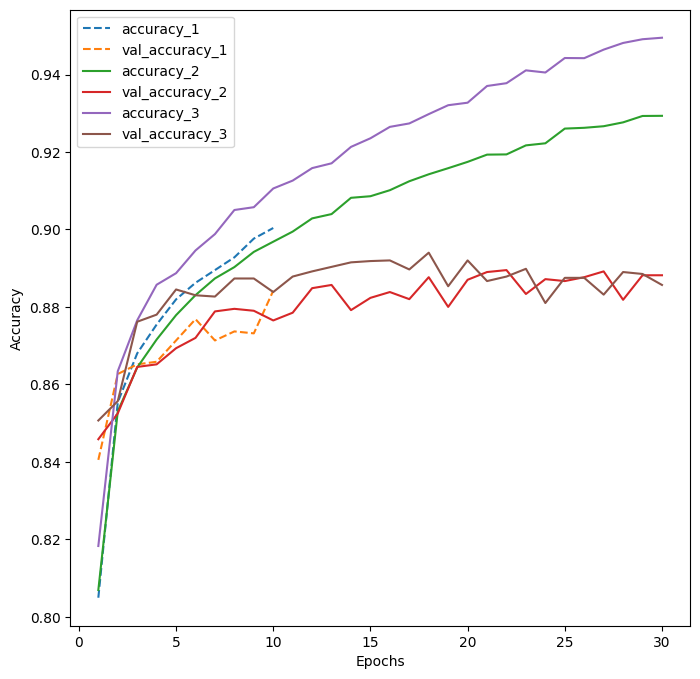

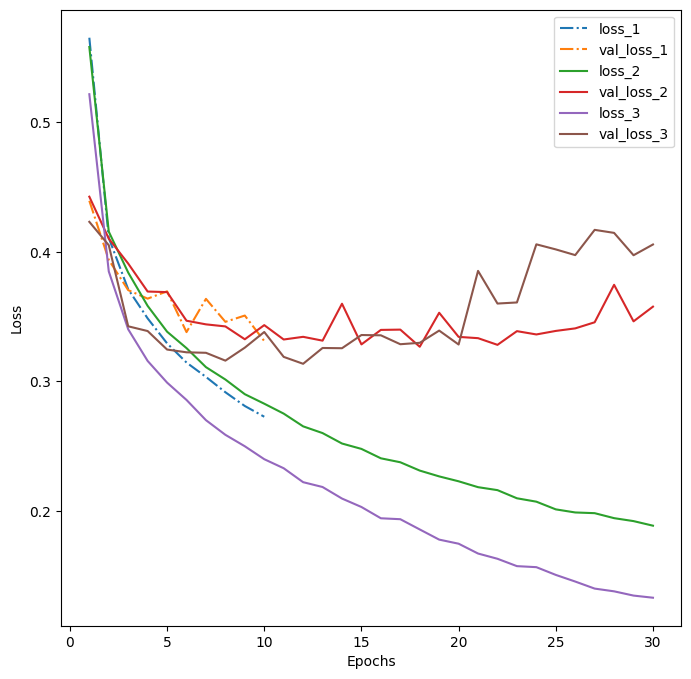

In [44]:
dict_hist = fit_history.history

dict_hist_2 = fit_history_2.history

dict_hist_3 = fit_history_3.history

list_ep = [i for i in range(1, 11)]

list_ep30 = [i for i in range(1, 31)]


plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy_1')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy_1')

plt.plot(list_ep30, dict_hist_2['accuracy'], label = 'accuracy_2')

plt.plot(list_ep30, dict_hist_2['val_accuracy'], label = 'val_accuracy_2')

plt.plot(list_ep30, dict_hist_3['accuracy'], label = 'accuracy_3')

plt.plot(list_ep30, dict_hist_3['val_accuracy'], label = 'val_accuracy_3')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '-.', label = 'loss_1')

plt.plot(list_ep, dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')

plt.plot(list_ep30, dict_hist_2['loss'], label = 'loss_2')

plt.plot(list_ep30, dict_hist_2['val_loss'], label = 'val_loss_2')

plt.plot(list_ep30, dict_hist_3['loss'], label = 'loss_3')

plt.plot(list_ep30, dict_hist_3['val_loss'], label = 'val_loss_3')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- We can see that accuracy keeps increasing for the test data as the number of epochs increased but validation accuracy has become somewhat constant after 10 epochs.
- This indicates that the model learns the training data more closely after each epoch but cannot replicate the performance on the validation data, which is a sign of overfitting.
- The same pattern can be observed for loss as well. It keeps decreasing for the training data with the increase in epochs but becomes somewhat constant for the validation data after 10 epochs.

Now, let's make final predictions on the test data using the last model we built.

## **Final Predictions on the Test Data**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.82      0.79      1000
           3       0.91      0.87      0.89      1000
           4       0.80      0.77      0.78      1000
           5       0.98      0.94      0.96      1000
           6       0.73      0.71      0.72      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



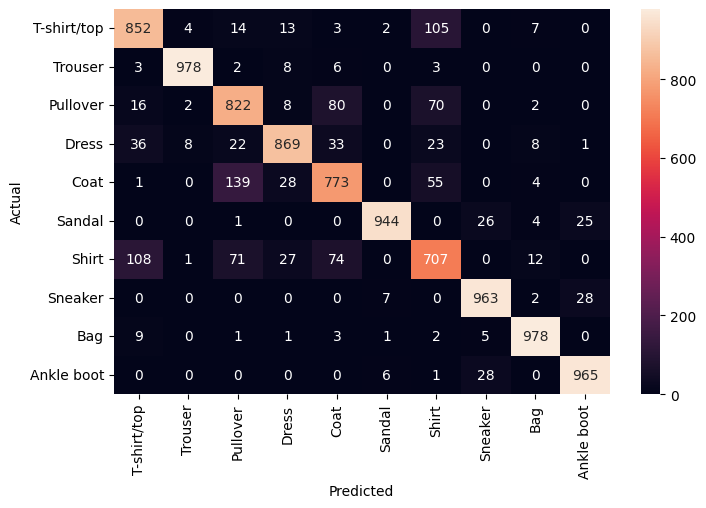

In [46]:
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)

metrics_score(Y_test, final_pred)

**Observations:**
- The precision and recall for class 6 (shirt) have increased. The confusion matrix shows that the model is still not able to differentiate between T-shirt/top and shirts but became better in differentiating shirts with Pullover and Coat.
- The model has become even better at identifying trousers. It has an f1-score of 98% for class 1 (Trousers).
- The overall accuracy on the test data is ~89%, which is approximately the same as the validation accuracy.

Let's visualize the images from the test data.
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
- Higher the probability more confident the model is about the prediction.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


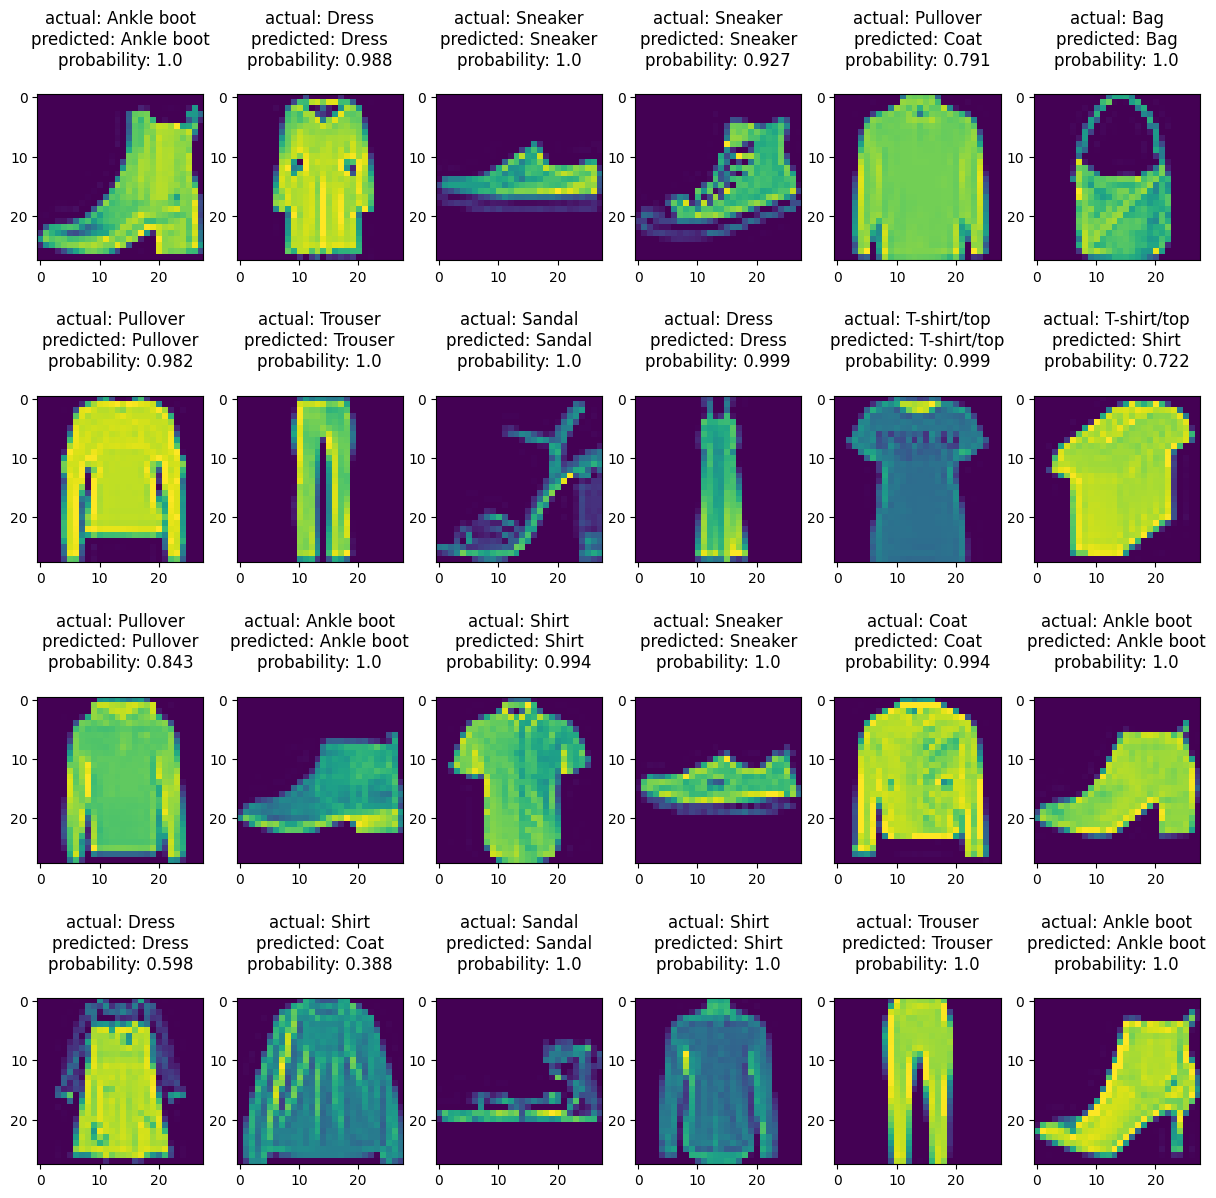

In [48]:
rows = 4

cols = 6

fig = plt.figure(figsize = (15, 15))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(Y_test))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(X_test[random_index, :])

        pred_label = class_names_list[final_pred[random_index]]

        true_label = class_names_list[Y_test[random_index]]

        y_pred_test_max_probas = np.max(model_3.predict(X_test), axis=1)

        pred_proba = y_pred_test_max_probas[random_index]

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))

plt.show()

## **Conclusion**

- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better do these models generalize.
- We have observed good performance on the train set but there is some amount of overfitting in the models that get more prominent as we increase the epochs.
- We went ahead with model 3 and evaluated the test data on it. We got an accuracy score of 89% with the classification report describing the class-wise recall and precision.
- Finally, we visualized some of the images from the test data.